In [2]:
# 0 = Angry, 1 = Disgust, 2 = Fear, 3 = Happy, 4 = Sad, 5 = Surprise, 6 = Neutral 

# Pixel size = 48x48

# Test data: 28,709 samples, train data: 3,589 samples

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import BatchNormalization
from keras.models import Sequential

In [4]:
#images = pd.read_csv('/Users/matilda/Mini project/FER_dataset/images/icml_face_data.csv')
images = pd.read_csv(r"C:\Users\magnu\Desktop\D7041E_FER\datasets\icml_face_data.csv")

In [5]:
emotion_num_map = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

In [6]:
def plot_images(df, emotion_class):
    emo_df = df[df.emotion==emotion_class]
    row = emo_df.sample(1)
    img = np.fromstring(row[' pixels'].iloc[0], dtype=int, sep=' ')
    img = np.reshape(img, (48, 48))
    image = np.zeros((48,48,3))
    image[:,:,0] = img
    image[:,:,1] = img
    image[:,:,2] = img
    image = np.array(image.astype(np.uint8))
    return image

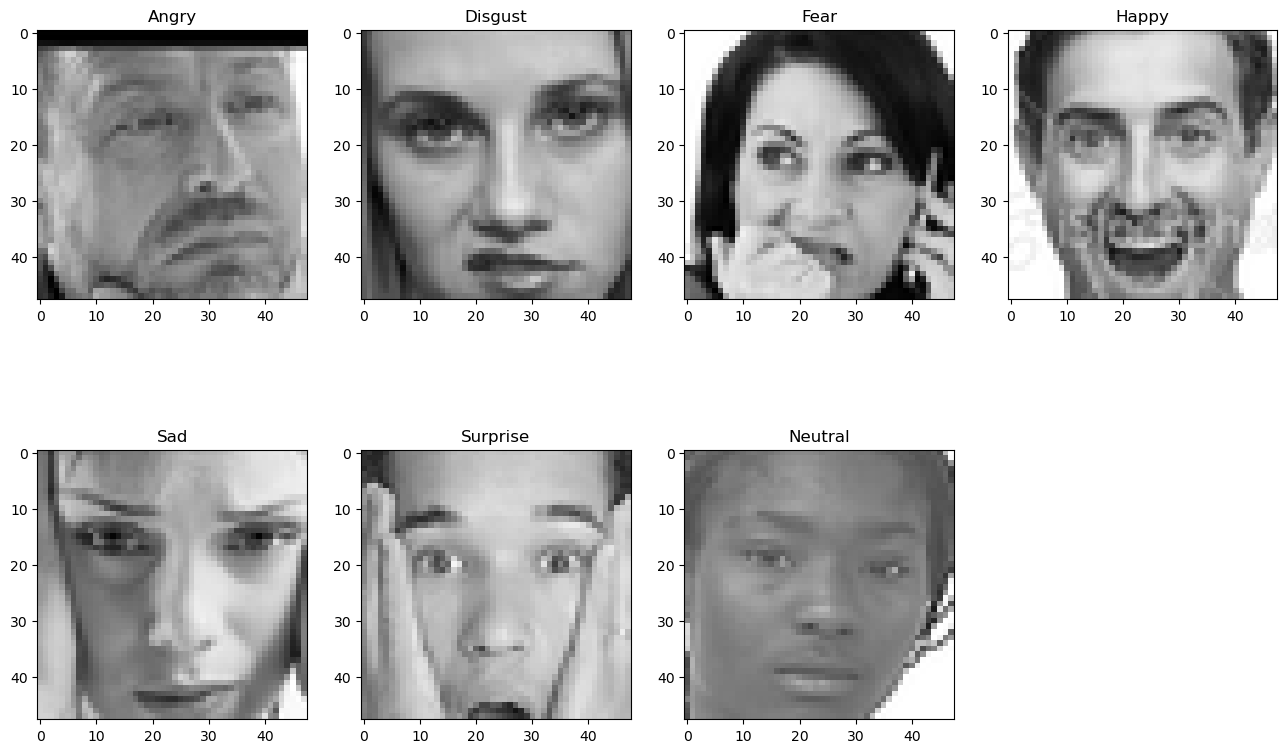

In [7]:
plt.figure(0, figsize=(16,10))
for i in range(7):
    plt.subplot(2,4,i+1)
    image = plot_images(images,i)
    plt.imshow(image)
    plt.title(emotion_num_map[i])

In [8]:
# Count the amount of samples in each emotion-category. Results show
# that we have very few disgust samples, which leads to an imbalance 
# among our training data. We also have a lot of happy people. 
images['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [9]:
# Preprocessing time! 

def preprocessData(inputData):
    processedInput = np.zeros(shape((inputData.shape[0], 48, 48)))
                                    
    for i, row in enumerate(inputData.index):                            
        newImage = np.fromstring(inputData.loc[row, ' pixels'], dtype=int, sep=' ')
        newImage = np.reshape(newImage, (48, 48))
        processedInput[i] = image      
    processedInput = processedInput.reshape((processedInput.shape[0], 48, 48, 1))
    processedInput = processedInput.astype('float32')/255
    processedInput = np.array(list(map(int, inputData['emotion'])))
    processedInput = to_categorical(imageLabels, 7)
    return  processedInput, imageLabels

In [10]:
def fer_improved_cnn():
    model = Sequential()
    model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    return model

In [ ]:
model = fer_improved_cnn()

In [ ]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
x_train = []
y_train = []
x_test = []
y_test = []
for index, row in images.iterrows():
  k = row[" pixels"].split(" ")
  if row[' Usage'] == 'Training':
    x_train.append(np.array(k))
    y_train.append(row['emotion'])
  elif row[' Usage'] == 'PublicTest':
    x_test.append(np.array(k))
    y_test.append(row['emotion'])

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
import tensorflow as tf

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
valid_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))

history = model.fit(train_data, validation_data=valid_data, epochs=10, batch_size=64)